***Importamos las librerias necesarias para hacer el modelo***

In [42]:
import numpy as np 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
import missingno as msno


***Leemos los datasets test, train***

In [43]:
datatrain = pd.read_csv('properties_colombia_train.csv')
datatest = pd.read_csv('properties_colombia_test.csv')

 ***Vemos las cinco primeras filas de los csv***

In [44]:
datatrain.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [45]:
datatest.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,...,NaN,2793.0,NaN,COP,NaN,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,...,2.0,NaN,NaN,COP,NaN,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY


***Hacemos un shape para saber cuantas filas y columnas tenemos en cada dataset***

In [46]:
datatrain.shape 

(197549, 27)

In [47]:
datatest.shape

(65850, 26)

***Utilizando la librería missingno podemos ver si hay valores nulos en la información a través de una visualización*** 

<AxesSubplot:>

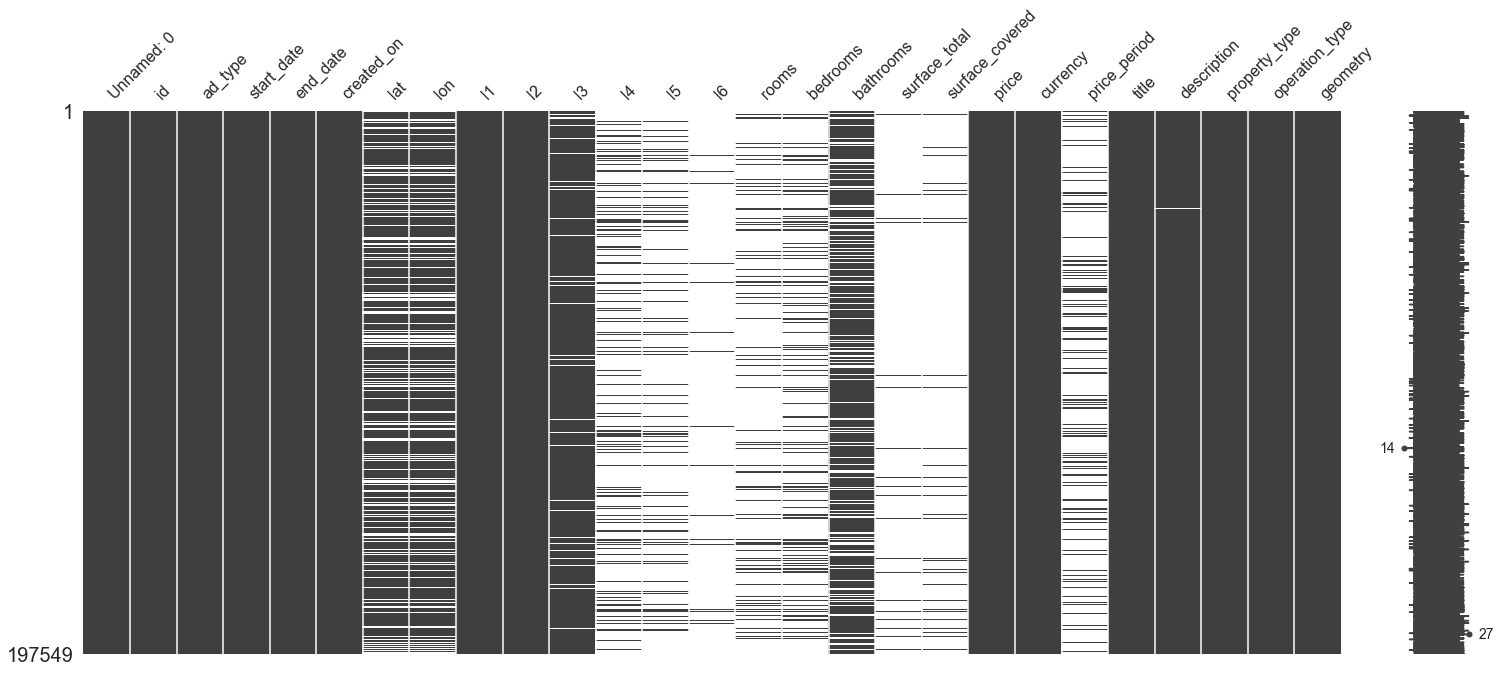

In [48]:
msno.matrix(datatrain)
#podemos obsevar que de 27 columnas 14 son las que tienen los 197549 registros

<AxesSubplot:>

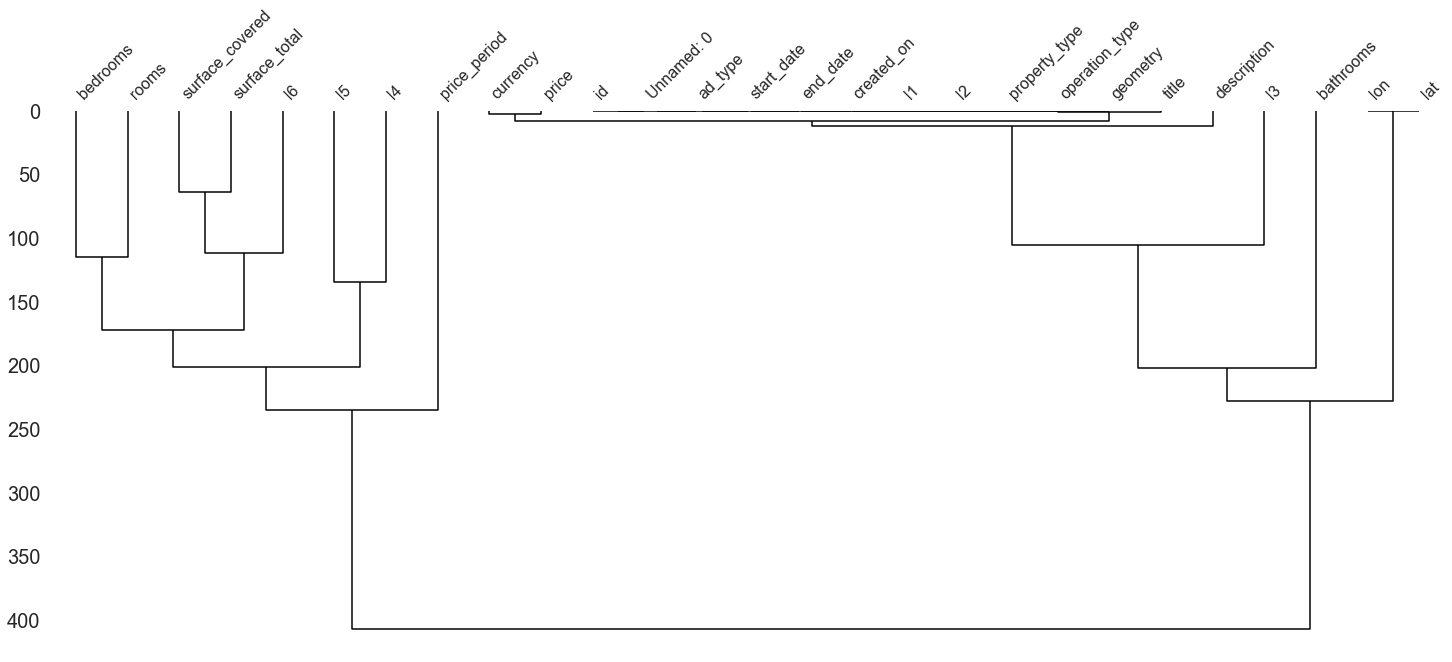

In [49]:
msno.dendrogram(datatrain) 
#similar a un arbol que se genera a traves de la agrupacion jerarquica, agrupa columnas que tienen fuertes correlaciones y nulidad.

<AxesSubplot:>

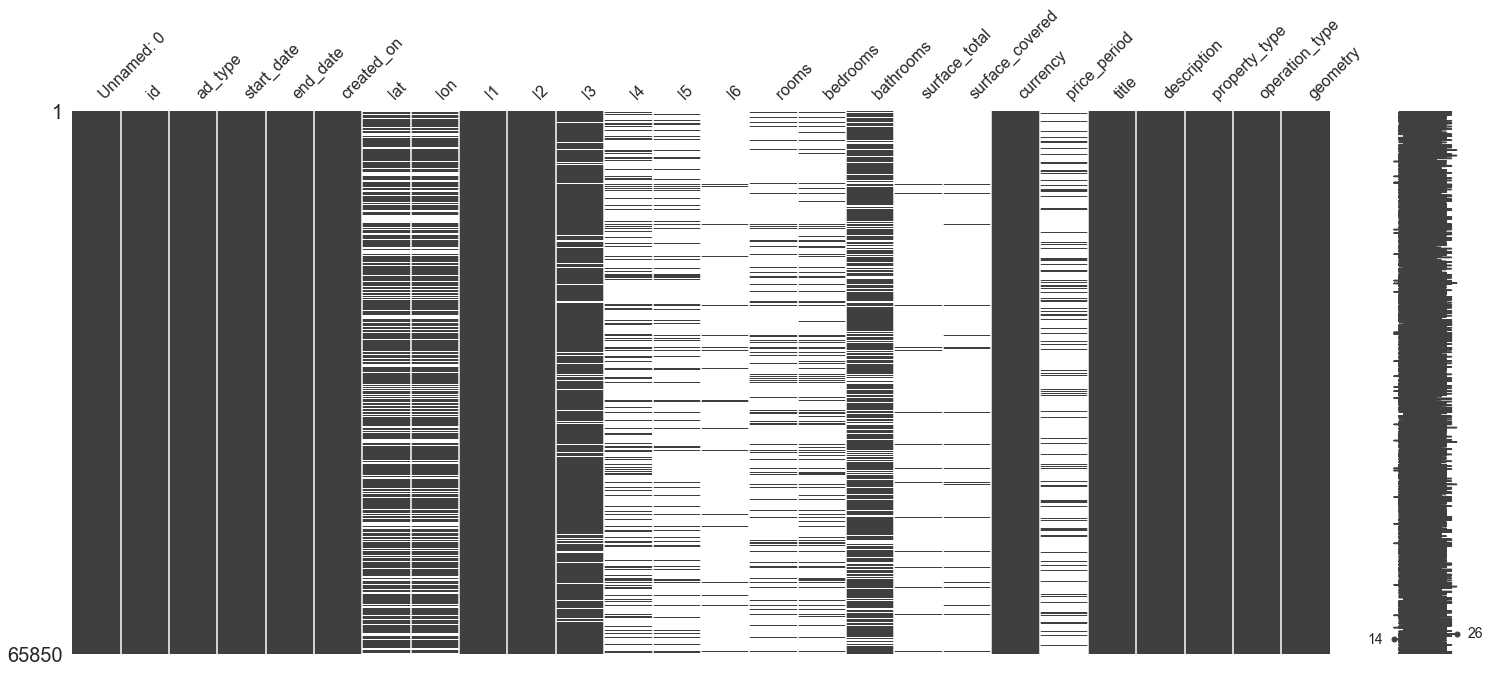

In [50]:
msno.matrix(datatest)
#podemos obsevar que de 26 columnas 14 son las que tienen los 65850 registros

<AxesSubplot:>

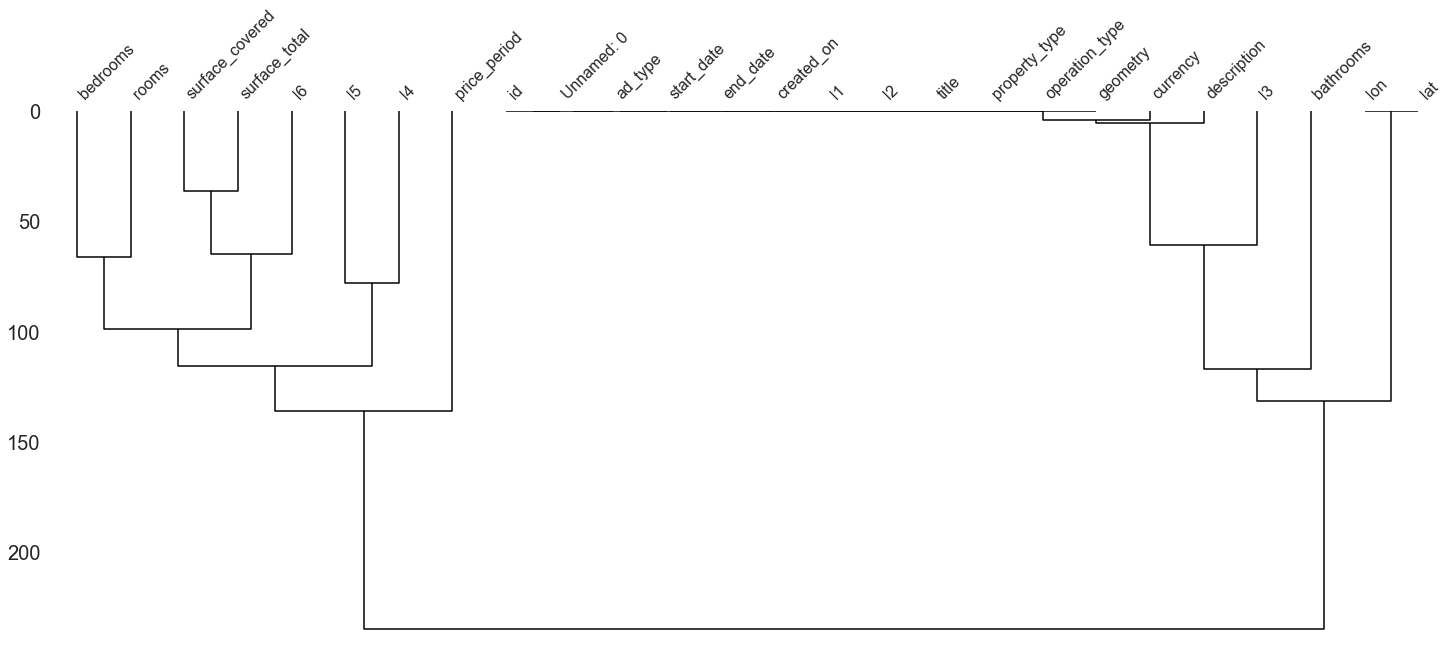

In [51]:
msno.dendrogram(datatest)
#similar a un arbol que se genera a traves de la agrupacion jerarquica, agrupa columnas que tienen fuertes correlaciones y nulidad.

*** Utilizamos info() nos describe qué tipo de elemento es, cuántos registros tiene y cuántas columnas***

In [52]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

In [53]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

***Grafico el heatmap de la matriz de correlacion***

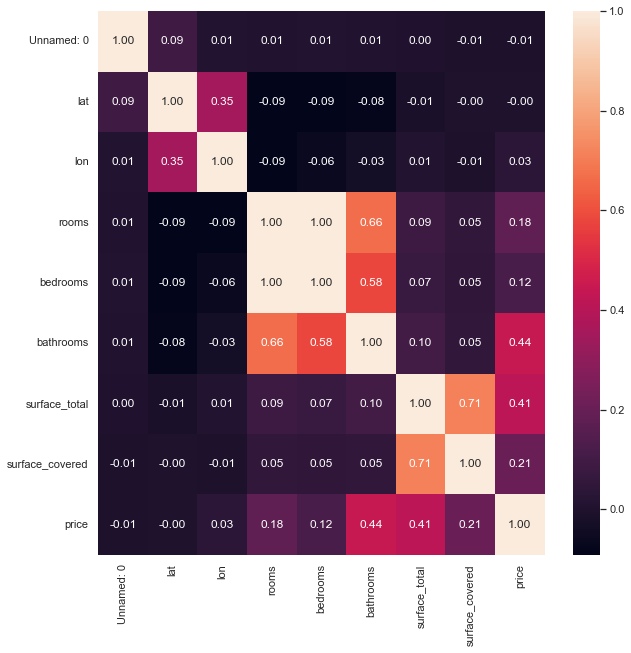

In [54]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(datatrain.corr(), cbar=True, annot=True, fmt='.2f')
plt.show()

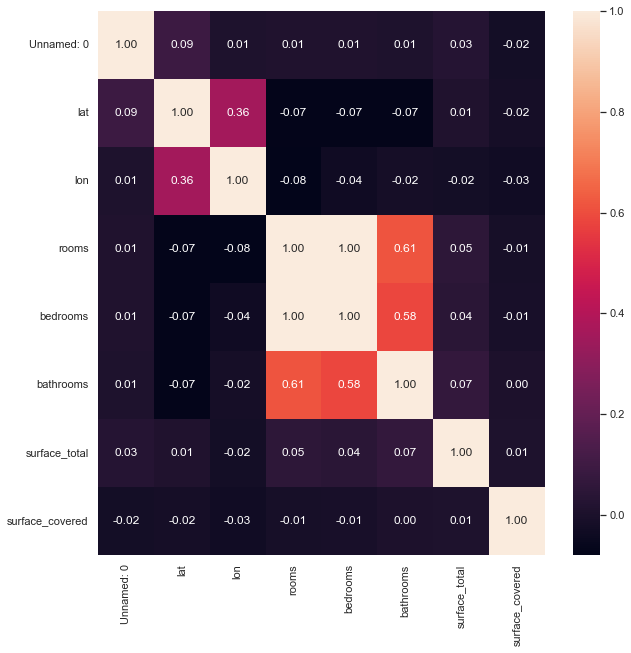

In [55]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(datatest.corr(), cbar=True, annot=True, fmt='.2f')
plt.show()

***Limpiando el datatrain***

***Realizo un analisis exploratorio de la columna precio y obtendremos algunas observaciones***

In [56]:
prices = datatrain['price']

# Minimo precio de la datatrain
minimum_price = np.amin(prices)

# Maximo precio de la datatrain
maximum_price = np.amax(prices)

# Media (Promedio) precio de la datatrain
mean_price = np.mean(prices)

# Desviacion estandar precio de la datatrain
std_price = np.std(prices)

# Mostrando las estadisiticas calculadas
print("Estadísticas para el conjunto de datos de Colombia en cuanto al precio:\n")
print("Precio minimo: ${}".format(minimum_price)) 
print("Precio maximo: ${}".format(maximum_price))
print("Precio promedio: ${}".format(mean_price))
print("Desviación estándar de precios: ${}".format(std_price))

Estadísticas para el conjunto de datos de Colombia en cuanto al precio:

Precio minimo: $0.0
Precio maximo: $345000000000.0
Precio promedio: $643605091.0064613
Desviación estándar de precios: $1944862782.9184294


***Realizo la predicion de categorizacion en una nueva columna de las propiedades entre 0 = baratas o 1 = caras***

In [57]:
mean_price = int(datatrain.price.mean())

datatrain['Precio_categorico'] = datatrain['price'].apply(lambda x: 1 if x > mean_price else 0)




***Elimino las columnas que contengan muchos Nan y no tenga casi relevancia de acuerdo a la grafica de matrix de la libreria missingno con drop*** 

In [58]:
datatrain = datatrain.drop(['ad_type','id','l4','l5', 'l6','start_date', 'end_date','Unnamed: 0', 'surface_total', 'price', 'price_period', 'surface_covered'], axis=1)
datatrain

,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,currency,title,description,property_type,operation_type,geometry,Precio_categorico
0,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,Medellín,NaN,4.0,4.0,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,NaN,3.0,2.0,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,NaN,NaN,2.0,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,2020-11-23,NaN,NaN,Colombia,Santander,Bucaramanga,NaN,NaN,1.0,COP,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,2020-10-06,NaN,NaN,Colombia,Antioquia,Medellín,NaN,NaN,2.0,COP,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,NaN,COP,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),0
197545,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,NaN,NaN,1.0,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
197546,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,NaN,NaN,1.0,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0
197547,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,Bogotá D.C,NaN,NaN,2.0,COP,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),0


In [59]:
#Verificamos si las columnas se eliminaron y vemos las cantidades de valores Nan de cada columna
datatrain.isna().sum()

created_on                0
lat                   49498
lon                   49498
l1                        0
l2                        0
l3                    11032
rooms                170012
bedrooms             157024
bathrooms             41082
currency                 67
title                     1
description             121
property_type             0
operation_type            0
geometry                  0
Precio_categorico         0
dtype: int64

***Llenando los valores faltantes con la media de cada columna, la funcion interpolate y con COP***

In [60]:
lat = datatrain['lat']
meanlat = np.mean(lat)
datatrain['lat'] = datatrain['lat'].fillna(meanlat)

long = datatrain['lon']
meanlon = np.mean(long)
datatrain['lon'] = datatrain['lon'].fillna(meanlon)

l_3 = datatrain['l3']
datatrain['l3'] = datatrain['l3'].fillna('Sin Dato')

room = datatrain['rooms']
meanrooms = np.mean(room)
datatrain['rooms'] = datatrain['rooms'].fillna(meanrooms)

bedroom = datatrain['bedrooms']
meanbedrooms = np.mean(bedroom)
datatrain['bedrooms'] = datatrain['bedrooms'].fillna(meanbedrooms)

bathroom = datatrain['bathrooms']
meanbathrooms = np.mean(bathroom)
datatrain['bathrooms'] = datatrain['bathrooms'].fillna(meanbathrooms)

curr = datatrain['currency']
datatrain['currency'] = datatrain['currency'].fillna('COP')

tit = datatrain['title']
datatrain['title'] = datatrain['title'].fillna('Sin Dato')

descrip = datatrain['description']
datatrain['description'] = datatrain['description'].fillna('Sin Dato')

In [61]:
#Verificando los valores nulos
datatrain.isna().sum()

created_on           0
lat                  0
lon                  0
l1                   0
l2                   0
l3                   0
rooms                0
bedrooms             0
bathrooms            0
currency             0
title                0
description          0
property_type        0
operation_type       0
geometry             0
Precio_categorico    0
dtype: int64

In [62]:
#Pasando las variables categoricas a numericas
datatrain = pd.get_dummies(datatrain, columns=['property_type', 'operation_type'], drop_first=True)


In [63]:
datatrain.head()

,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,currency,...,description,geometry,Precio_categorico,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero
0,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,Medellín,3.291208,4.000000,4.0,COP,...,<b>Hermosa Mansión En El Poblado. Área Constru...,POINT (-75.572 6.203),1,1,0,0,0,0,0,0
1,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,3.291208,3.000000,2.0,COP,...,Venta apartamento en piso 16 con vista exterio...,POINT (-74.0731146 4.7227485),0,0,0,0,0,0,0,0
2,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,3.291208,3.239062,2.0,COP,...,Al entrar a este bonito apartamento interior e...,POINT (-74.03 4.709),0,1,0,0,0,0,0,0
3,2020-11-23,5.666001,-75.041045,Colombia,Santander,Bucaramanga,3.291208,3.239062,1.0,COP,...,Se encuentra ubicado en el sector de la Cabece...,POINT EMPTY,1,0,0,0,0,0,1,0
4,2020-10-06,5.666001,-75.041045,Colombia,Antioquia,Medellín,3.291208,3.239062,2.0,COP,...,Codigo Inmueble 4302 Apartamento con 3 habitac...,POINT EMPTY,0,0,0,0,0,0,0,0


***Limpiando el datatest***

In [64]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

In [65]:
datatest = datatest.drop(['ad_type', 'id','l4','l5', 'l6','start_date', 'end_date','Unnamed: 0', 'surface_total', 'price_period', 'surface_covered'], axis=1)
datatest

,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,currency,title,description,property_type,operation_type,geometry
0,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,3.0,COP,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,NaN,NaN,3.0,COP,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
2,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,Medellín,NaN,NaN,1.0,COP,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
3,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,Medellín,NaN,NaN,NaN,COP,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
4,2020-12-10,NaN,NaN,Colombia,Antioquia,Medellín,NaN,NaN,2.0,COP,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,2020-12-02,6.212981,-75.599349,Colombia,Antioquia,Medellín,3.0,3.0,NaN,COP,Venta de Apartamento La Mota,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",Apartamento,Venta,POINT (-75.5993485451 6.2129806633)
65846,2020-07-27,5.041331,-75.512415,Colombia,Caldas,Manizales,NaN,NaN,1.0,COP,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)
65847,2020-11-06,5.064733,-75.670570,Colombia,Caldas,Palestina,NaN,NaN,2.0,COP,Vende casa campestre en Santagueda _ wasi660842,Casa campestre en conjunto cerrado de 4 alcoba...,Otro,Venta,POINT (-75.67057009 5.06473281)
65848,2020-12-14,7.138641,-73.127312,Colombia,Santander,Bucaramanga,NaN,NaN,2.0,COP,Vendo apto facilidad de pago,Vendo apto bien ubicado 3 habitación 2 baños s...,Apartamento,Venta,POINT (-73.12731171 7.13864078)


In [66]:
datatest.isna().sum()

created_on            0
lat               16417
lon               16417
l1                    0
l2                    0
l3                 3657
rooms             56740
bedrooms          52447
bathrooms         13796
currency             17
title                 0
description          27
property_type         0
operation_type        0
geometry              0
dtype: int64

In [67]:
lat1 = datatest['lat']
meanlat1 = np.mean(lat1)
datatest['lat'] = datatest['lat'].fillna(meanlat1)

long1 = datatest['lon']
meanlon = np.mean(long1)
datatest['lon'] = datatest['lon'].fillna(meanlon)

l_3_1 = datatest['l3']
datatest['l3'] = datatest['l3'].fillna('Sin Dato')

room1 = datatest['rooms']
meanrooms1 = np.mean(room1)
datatest['rooms'] = datatest['rooms'].fillna(meanrooms1)

bedroom1 = datatest['bedrooms']
meanbedrooms1 = np.mean(bedroom1)
datatest['bedrooms'] = datatest['bedrooms'].fillna(meanbedrooms1)

bathroom1 = datatest['bathrooms']
meanbathrooms1 = np.mean(bathroom1)
datatest['bathrooms'] = datatest['bathrooms'].fillna(meanbathrooms1)

curr = datatest['currency']
datatest['currency'] = datatest['currency'].fillna('COP')

descrip1 = datatest['description']
datatest['description'] = datatest['description'].fillna('Sin Dato')

In [68]:
datatest.isna().sum()

created_on        0
lat               0
lon               0
l1                0
l2                0
l3                0
rooms             0
bedrooms          0
bathrooms         0
currency          0
title             0
description       0
property_type     0
operation_type    0
geometry          0
dtype: int64

In [69]:
#Pasando las variables categoricas a numericas
datatest = pd.get_dummies(datatest, columns=['property_type', 'operation_type'], drop_first=True)


In [70]:
datatest.head()

,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,currency,title,description,geometry,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero
0,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.000000,3.000000,3.000000,COP,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",POINT (-74.075 4.722),1,0,0,0,0,0,0
1,2020-10-20,5.686868,-75.042164,Colombia,Antioquia,Envigado,3.282327,3.236813,3.000000,COP,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",POINT EMPTY,0,0,0,0,0,0,0
2,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,Medellín,3.282327,3.236813,1.000000,COP,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",POINT (-75.6283806 6.25925267),1,0,0,0,0,0,0
3,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,Medellín,3.282327,3.236813,2.639624,COP,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,POINT (-75.556 6.203),0,0,0,1,0,0,0
4,2020-12-10,5.686868,-75.042164,Colombia,Antioquia,Medellín,3.282327,3.236813,2.000000,COP,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,POINT EMPTY,1,0,0,0,0,0,0


***Eliminando en ambos datasets columnas***

In [71]:
datatrain = datatrain.drop(['created_on','l1', 'l2', 'l3', 'currency', 'title', 'description','geometry'], axis=1)

datatest = datatest.drop(['created_on','l1', 'l2', 'l3', 'currency', 'title', 'description','geometry'], axis=1)

In [72]:
datatrain.shape

(197549, 13)

In [73]:
datatest.shape

(65850, 12)

In [74]:
datatrain.head(3)

,lat,lon,rooms,bedrooms,bathrooms,Precio_categorico,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero
0,6.203000,-75.572000,3.291208,4.000000,4.0,1,1,0,0,0,0,0,0
1,4.722748,-74.073115,3.291208,3.000000,2.0,0,0,0,0,0,0,0,0
2,4.709000,-74.030000,3.291208,3.239062,2.0,0,1,0,0,0,0,0,0


***Sacando la correlacion con los datasets limpios***

<AxesSubplot:>

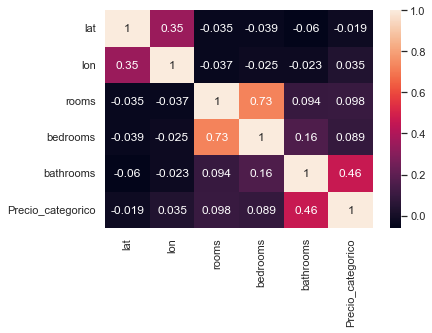

In [75]:
numeric_cols = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'Precio_categorico']
cm = np.corrcoef(datatrain[numeric_cols].values.T)
sns.set(font_scale = 1.0)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

***Entrenando el Modelo***

In [76]:
# Definimos la variable X,y
X = datatrain.drop(['Precio_categorico'],axis=1)
y = datatrain.Precio_categorico

In [77]:
# Dividimos el dataset en training set y test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\Users\kfln0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# Se calcula la matriz de confusión
cm = confusion_matrix(y_test,y_pred)
cm

array([[43572,  1677],
       [ 9686,  4330]], dtype=int64)

In [80]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print('recall:',recall)
print('accuracy:',accuracy)

recall: 0.3089326484018265
accuracy: 0.8082679490424365


***Sacando las metricas***

In [81]:
# me pide que haga una prediccion con el dataset proporcionado
X_train_dataset = datatest 

In [82]:
# me fijo q la variable con el q hice el entrenamiento tenga los mismo numeros de columnas = 12
X_train.shape

(138284, 12)

In [83]:
# me fijo q la variable con el q voy a predecir tenga los mismo numeros de columnas = 12
X_train_dataset.shape

(65850, 12)

In [84]:
# ahora toca hacer la prediccion con el dataset de prueba brindada
y_pred_dataset = logreg.predict(X_train_dataset)

***Llevando la columna de prediccion a CSV***

In [85]:
prediccion = pd.DataFrame(y_pred_dataset, columns = ['pred'])

In [86]:
prediccion.to_csv('Karenuzca.csv', index = False)